In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
df1 = pd.read_csv('df1_modified.csv')
df2 = pd.read_csv('df2_modified.csv')
df3 = pd.read_csv('df3_modified.csv')

df_concat = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
pd.set_option('display.max_columns', None)
df_concat

,underlying_symbol,quote_datetime,root,expiration,strike,option_type,open,high,low,close,trade_volume,bid_size,bid,ask_size,ask,underlying_bid,underlying_ask,implied_underlying_price,active_underlying_price,implied_volatility,delta,gamma,theta,vega,rho,open_interest,risk_free_rate,time_to_maturity,option_price
0,^SPX,2024-07-26 10:30:00,SPX,2024-08-16,200.0,C,0.0,0.0,0.0,0.0,0,27,5247.4,27,5252.6,5452.04,5456.22,0.0,5454.130,5.4324,0.9995,0.0000,0.0,0.0314,-0.0047,24,5.49,0.083333,5250.00
1,^SPX,2024-07-26 11:30:00,SPX,2024-08-16,200.0,C,0.0,0.0,0.0,0.0,0,43,5244.0,43,5247.8,5447.04,5450.09,0.0,5448.565,5.0932,0.9997,0.0000,0.0,0.0202,-0.0117,24,5.49,0.083333,5245.90
2,^SPX,2024-07-26 12:30:00,SPX,2024-08-16,200.0,C,0.0,0.0,0.0,0.0,0,43,5267.7,43,5271.6,5471.24,5474.09,0.0,5472.665,4.9448,0.9998,0.0000,0.0,0.0160,-0.0184,24,5.49,0.083333,5269.65
3,^SPX,2024-07-26 13:30:00,SPX,2024-08-16,200.0,C,0.0,0.0,0.0,0.0,0,43,5282.9,43,5286.6,5486.01,5488.51,0.0,5487.260,4.8580,1.0000,0.0000,0.0,0.0141,-0.0210,24,5.49,0.083333,5284.75
4,^SPX,2024-07-26 14:30:00,SPX,2024-08-16,200.0,C,0.0,0.0,0.0,0.0,0,43,5257.3,43,5260.5,5460.76,5463.44,0.0,5462.100,4.2050,1.0000,0.0000,0.0,0.0034,-0.0269,24,5.49,0.083333,5258.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513725,^SPX,2024-09-27 12:30:00,SPXW,2025-09-30,7800.0,P,0.0,0.0,0.0,0.0,0,1,1778.5,1,1811.2,5743.21,5745.98,0.0,5744.595,0.1322,-0.9816,0.0001,0.0,3.6619,-74.5091,2,3.55,1.460317,1794.85
513726,^SPX,2024-09-27 13:30:00,SPXW,2025-09-30,7800.0,P,0.0,0.0,0.0,0.0,0,1,1782.9,1,1816.0,5738.07,5740.61,0.0,5739.340,0.1304,-0.9837,0.0001,0.0,3.4177,-74.6205,2,3.55,1.460317,1799.45
513727,^SPX,2024-09-27 14:30:00,SPXW,2025-09-30,7800.0,P,0.0,0.0,0.0,0.0,0,1,1788.6,1,1821.3,5732.40,5735.07,0.0,5733.735,0.1302,-0.9844,0.0001,0.0,3.3423,-74.6503,2,3.55,1.460317,1804.95
513728,^SPX,2024-09-27 15:30:00,SPXW,2025-09-30,7800.0,P,0.0,0.0,0.0,0.0,0,1,1781.4,1,1814.1,5740.63,5742.92,0.0,5741.775,0.1301,-0.9837,0.0001,0.0,3.4058,-74.6146,2,3.55,1.460317,1797.75


In [3]:
pd.read_csv('df3_modified.csv', index_col=0, nrows=0).columns.tolist()

['quote_datetime',
 'root',
 'expiration',
 'strike',
 'option_type',
 'open',
 'high',
 'low',
 'close',
 'trade_volume',
 'bid_size',
 'bid',
 'ask_size',
 'ask',
 'underlying_bid',
 'underlying_ask',
 'implied_underlying_price',
 'active_underlying_price',
 'implied_volatility',
 'delta',
 'gamma',
 'theta',
 'vega',
 'rho',
 'open_interest',
 'risk_free_rate',
 'time_to_maturity',
 'option_price']

In [4]:
df_SPX = df_concat[df_concat['root'] == 'SPX']
df_SPXW = df_concat[df_concat['root'] == 'SPXW']

In [5]:
#split based on calls and puts
df_SPX_calls = df_SPX[df_SPX['option_type'] == 'C']
df_SPX_puts = df_SPX[df_SPX['option_type'] == 'P']
df_SPXW_calls = df_SPXW[df_SPXW['option_type'] == 'C']
df_SPXW_puts = df_SPXW[df_SPXW['option_type'] == 'P']

# SPX calls

In [6]:
X = df_SPX_calls.drop(columns=['option_price', 'underlying_symbol', 'option_type','root'])
#Convert to Elapsed Time
X['quote_datetime'] = pd.to_datetime(X['quote_datetime'])
X['seconds_since'] = (X['quote_datetime'] - X['quote_datetime'].min()).dt.total_seconds()
X = X.drop(columns=['quote_datetime'])
X['expiration'] = pd.to_datetime(X['expiration'])
X['expiration_when'] = (X['expiration'] - X['expiration'].min()).dt.total_seconds()
X = X.drop(columns=['expiration'])
y = df_SPX_calls['option_price']
X

,strike,open,high,low,close,trade_volume,bid_size,bid,ask_size,ask,underlying_bid,underlying_ask,implied_underlying_price,active_underlying_price,implied_volatility,delta,gamma,theta,vega,rho,open_interest,risk_free_rate,time_to_maturity,seconds_since,expiration_when
0,200.0,0.0,0.0,0.0,0.0,0,27,5247.4,27,5252.6,5452.04,5456.22,0.0,5454.130,5.4324,0.9995,0.0000,0.0000,0.0314,-0.0047,24,5.49,0.083333,0.0,0.0
1,200.0,0.0,0.0,0.0,0.0,0,43,5244.0,43,5247.8,5447.04,5450.09,0.0,5448.565,5.0932,0.9997,0.0000,0.0000,0.0202,-0.0117,24,5.49,0.083333,3600.0,0.0
2,200.0,0.0,0.0,0.0,0.0,0,43,5267.7,43,5271.6,5471.24,5474.09,0.0,5472.665,4.9448,0.9998,0.0000,0.0000,0.0160,-0.0184,24,5.49,0.083333,7200.0,0.0
3,200.0,0.0,0.0,0.0,0.0,0,43,5282.9,43,5286.6,5486.01,5488.51,0.0,5487.260,4.8580,1.0000,0.0000,0.0000,0.0141,-0.0210,24,5.49,0.083333,10800.0,0.0
4,200.0,0.0,0.0,0.0,0.0,0,43,5257.3,43,5260.5,5460.76,5463.44,0.0,5462.100,4.2050,1.0000,0.0000,0.0000,0.0034,-0.0269,24,5.49,0.083333,14400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396888,10000.0,0.0,0.0,0.0,0.0,0,1,77.5,21,90.7,5743.21,5745.98,0.0,5744.595,0.1329,0.1227,0.0001,-0.0742,26.3398,31.0848,3605,3.60,7.583333,5450400.0,168739200.0
396889,10000.0,0.0,0.0,0.0,0.0,0,2,85.0,21,90.1,5738.07,5740.61,0.0,5739.340,0.1346,0.1258,0.0001,-0.0763,26.7245,31.7390,3605,3.60,7.583333,5454000.0,168739200.0
396890,10000.0,85.0,85.0,85.0,85.0,2,1,77.5,10,93.6,5732.40,5735.07,0.0,5733.735,0.1340,0.1239,0.0001,-0.0751,26.4340,31.2640,3605,3.60,7.583333,5457600.0,168739200.0
396891,10000.0,0.0,0.0,0.0,0.0,0,1,77.5,10,86.0,5740.63,5742.92,0.0,5741.775,0.1320,0.1205,0.0001,-0.0728,26.0157,30.5471,3605,3.60,7.583333,5461200.0,168739200.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test) 
scaler_y = StandardScaler()
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Normalize the target variable (option prices)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)  # Fit and transform y_train
y_test_scaled = scaler_y.transform(y_test)        # Transform y_test (use the same scaler)

In [9]:
# Define the ANN model
model = Sequential()

# Add input layer and one hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add another hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer for regression
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict on test set
y_pred = model.predict(X_test)

# Inverse transform to get the original scale of predictions
y_pred_original_scale = scaler_y.inverse_transform(y_pred)

# Evaluate the model performance
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {mse}')

Epoch 1/20
2074/2074 [==============================] - 5s 2ms/step - loss: 0.0134 - val_loss: 2599952.7500
Epoch 2/20
2074/2074 [==============================] - 5s 2ms/step - loss: 0.0031 - val_loss: 2599964.0000
Epoch 3/20
2074/2074 [==============================] - 4s 2ms/step - loss: 9.7146e-04 - val_loss: 2599932.7500
Epoch 4/20
2074/2074 [==============================] - 4s 2ms/step - loss: 0.0017 - val_loss: 2599984.7500
Epoch 5/20
2074/2074 [==============================] - 4s 2ms/step - loss: 4.7189e-04 - val_loss: 2599954.2500
Epoch 6/20
2074/2074 [==============================] - 5s 3ms/step - loss: 3.0468e-04 - val_loss: 2599955.2500
Epoch 7/20
2074/2074 [==============================] - 4s 2ms/step - loss: 4.0823e-04 - val_loss: 2599959.7500
Epoch 8/20
2074/2074 [==============================] - 4s 2ms/step - loss: 3.8513e-04 - val_loss: 2599959.2500
Epoch 9/20
2074/2074 [==============================] - 5s 2ms/step - loss: 2.2682e-04 - val_loss: 2599958.2500
Epoc

In [10]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_original_scale))
print(f"RMSE on Original Scale: {rmse}")

RMSE on Original Scale: 13.286856205295399


In [11]:
print(f'Predicted prices: {y_pred_original_scale}')
print(f'Actual prices: {y_test}')

Predicted prices: [[ 26.608149 ]
 [  7.2462106]
 [571.60516  ]
 ...
 [505.6795   ]
 [614.7614   ]
 [142.83752  ]]
Actual prices: [[ 20.9 ]
 [  1.15]
 [568.4 ]
 ...
 [513.2 ]
 [609.1 ]
 [142.7 ]]


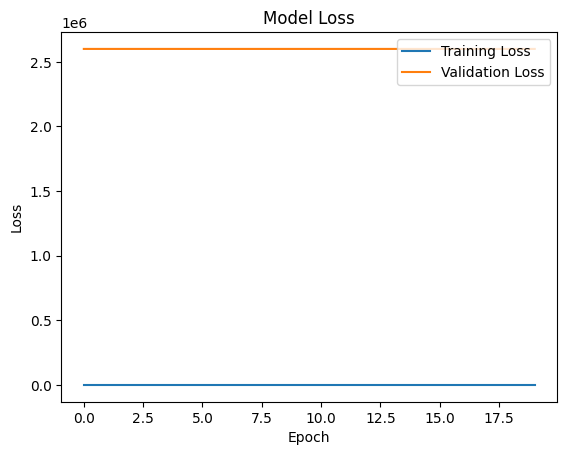

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# SPX puts

In [13]:
X = df_SPX_puts.drop(columns=['option_price', 'underlying_symbol', 'option_type','root'])
#Convert to Elapsed Time
X['quote_datetime'] = pd.to_datetime(X['quote_datetime'])
X['seconds_since'] = (X['quote_datetime'] - X['quote_datetime'].min()).dt.total_seconds()
X = X.drop(columns=['quote_datetime'])
X['expiration'] = pd.to_datetime(X['expiration'])
X['expiration_when'] = (X['expiration'] - X['expiration'].min()).dt.total_seconds()
X = X.drop(columns=['expiration'])
y = df_SPX_puts['option_price']
X

,strike,open,high,low,close,trade_volume,bid_size,bid,ask_size,ask,underlying_bid,underlying_ask,implied_underlying_price,active_underlying_price,implied_volatility,delta,gamma,theta,vega,rho,open_interest,risk_free_rate,time_to_maturity,seconds_since,expiration_when
7,200.0,0.0,0.0,0.0,0.0,0,0,0.00,1416,0.05,5452.04,5456.22,0.0,5454.130,3.7939,-0.0000,0.0000,-0.0085,0.0011,-0.0001,368,5.49,0.083333,0.0,0.0
8,200.0,0.0,0.0,0.0,0.0,0,0,0.00,1501,0.05,5447.04,5450.09,0.0,5448.565,3.7963,-0.0000,0.0000,-0.0085,0.0011,-0.0001,368,5.49,0.083333,3600.0,0.0
9,200.0,0.0,0.0,0.0,0.0,0,0,0.00,1454,0.05,5471.24,5474.09,0.0,5472.665,3.8050,-0.0000,0.0000,-0.0085,0.0011,-0.0001,368,5.49,0.083333,7200.0,0.0
10,200.0,0.0,0.0,0.0,0.0,0,0,0.00,1491,0.05,5486.01,5488.51,0.0,5487.260,3.8112,-0.0000,0.0000,-0.0085,0.0011,-0.0001,368,5.49,0.083333,10800.0,0.0
11,200.0,0.0,0.0,0.0,0.0,0,0,0.00,1446,0.05,5460.76,5463.44,0.0,5462.100,3.8107,-0.0000,0.0000,-0.0086,0.0011,-0.0001,368,5.49,0.083333,14400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396895,10000.0,0.0,0.0,0.0,0.0,0,5,2852.90,5,2932.90,5743.21,5745.98,0.0,5744.595,0.1394,-0.8999,0.0001,0.0000,28.3630,-411.3694,15,3.60,7.583333,5450400.0,168739200.0
396896,10000.0,0.0,0.0,0.0,0.0,0,5,2858.80,5,2938.80,5738.07,5740.61,0.0,5739.340,0.1389,-0.9019,0.0001,0.0000,28.0444,-411.9899,15,3.60,7.583333,5454000.0,168739200.0
396897,10000.0,0.0,0.0,0.0,0.0,0,5,2863.90,5,2943.90,5732.40,5735.07,0.0,5733.735,0.1395,-0.9010,0.0001,0.0000,28.1308,-411.6968,15,3.60,7.583333,5457600.0,168739200.0
396898,10000.0,0.0,0.0,0.0,0.0,0,5,2857.70,5,2937.70,5740.63,5742.92,0.0,5741.775,0.1398,-0.8997,0.0001,0.0000,28.4119,-411.4131,15,3.60,7.583333,5461200.0,168739200.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test) 
scaler_y = StandardScaler()
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Normalize the target variable (option prices)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)  # Fit and transform y_train
y_test_scaled = scaler_y.transform(y_test)        # Transform y_test (use the same scaler)

In [16]:
# Define the ANN model
model = Sequential()

# Add input layer and one hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add another hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer for regression
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict on test set
y_pred = model.predict(X_test)

# Inverse transform to get the original scale of predictions
y_pred_original_scale = scaler_y.inverse_transform(y_pred)

# Evaluate the model performance
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {mse}')

Epoch 1/20
2074/2074 [==============================] - 6s 3ms/step - loss: 0.0201 - val_loss: 478368.3750
Epoch 2/20
2074/2074 [==============================] - 6s 3ms/step - loss: 0.0012 - val_loss: 478361.0000
Epoch 3/20
2074/2074 [==============================] - 4s 2ms/step - loss: 8.6301e-04 - val_loss: 478349.7812
Epoch 4/20
2074/2074 [==============================] - 4s 2ms/step - loss: 5.2252e-04 - val_loss: 478358.1250
Epoch 5/20
2074/2074 [==============================] - 5s 2ms/step - loss: 5.0368e-04 - val_loss: 478351.9375
Epoch 6/20
2074/2074 [==============================] - 5s 2ms/step - loss: 4.1842e-04 - val_loss: 478344.1250
Epoch 7/20
2074/2074 [==============================] - 4s 2ms/step - loss: 2.2796e-04 - val_loss: 478350.2188
Epoch 8/20
2074/2074 [==============================] - 4s 2ms/step - loss: 2.6269e-04 - val_loss: 478354.7188
Epoch 9/20
2074/2074 [==============================] - 5s 2ms/step - loss: 3.5244e-04 - val_loss: 478339.4688
Epoch 10/

In [17]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_original_scale))
print(f"RMSE on Original Scale: {rmse}")

RMSE on Original Scale: 2.890054462493067


In [18]:
print(f'Predicted prices: {y_pred_original_scale}')
print(f'Actual prices: {y_test}')

Predicted prices: [[ 162.77829]
 [3198.661  ]
 [ 112.49999]
 ...
 [ 782.90765]
 [1152.9491 ]
 [1519.3329 ]]
Actual prices: [[ 159.85]
 [3193.25]
 [ 112.5 ]
 ...
 [ 780.  ]
 [1153.7 ]
 [1524.  ]]


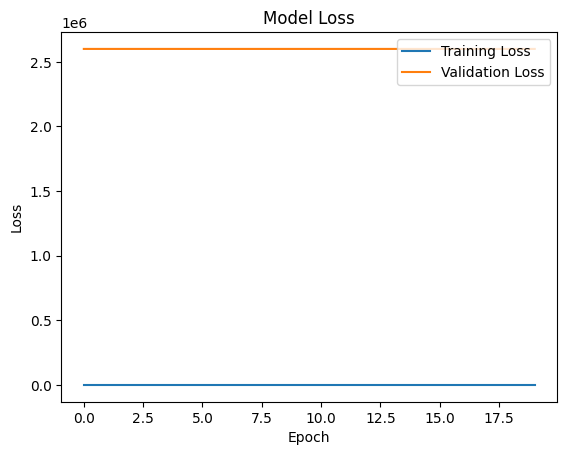

In [19]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# SPXW calls

In [20]:
X = df_SPXW_calls.drop(columns=['option_price', 'underlying_symbol', 'option_type','root'])
#Convert to Elapsed Time
X['quote_datetime'] = pd.to_datetime(X['quote_datetime'])
X['seconds_since'] = (X['quote_datetime'] - X['quote_datetime'].min()).dt.total_seconds()
X = X.drop(columns=['quote_datetime'])
X['expiration'] = pd.to_datetime(X['expiration'])
X['expiration_when'] = (X['expiration'] - X['expiration'].min()).dt.total_seconds()
X = X.drop(columns=['expiration'])
y = df_SPXW_calls['option_price']
X

,strike,open,high,low,close,trade_volume,bid_size,bid,ask_size,ask,underlying_bid,underlying_ask,implied_underlying_price,active_underlying_price,implied_volatility,delta,gamma,theta,vega,rho,open_interest,risk_free_rate,time_to_maturity,seconds_since,expiration_when
54964,1400.0,0.0,0.0,0.0,0.0,0,9,4050.6,1,4063.2,5452.04,5456.22,0.0,5454.130,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4,5.49,0.000000,0.0,0.0
54965,1400.0,0.0,0.0,0.0,0.0,0,16,4046.5,1,4049.3,5447.04,5450.09,0.0,5448.565,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4,5.49,0.000000,3600.0,0.0
54966,1400.0,0.0,0.0,0.0,0.0,0,1,4072.4,1,4073.1,5471.24,5474.09,0.0,5472.665,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4,5.49,0.000000,7200.0,0.0
54967,1400.0,0.0,0.0,0.0,0.0,0,1,4087.5,15,4090.6,5486.01,5488.51,0.0,5487.260,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4,5.49,0.000000,10800.0,0.0
54968,1400.0,0.0,0.0,0.0,0.0,0,16,4059.5,16,4066.9,5460.76,5463.44,0.0,5462.100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4,5.49,0.000000,14400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513718,7800.0,0.0,0.0,0.0,0.0,0,26,3.5,63,3.8,5743.21,5745.98,0.0,5744.595,0.1225,0.0160,0.0001,-0.0359,2.6805,0.8615,2,3.55,1.460317,5450400.0,37238400.0
513719,7800.0,0.0,0.0,0.0,0.0,0,178,3.5,63,3.8,5738.07,5740.61,0.0,5739.340,0.1229,0.0160,0.0001,-0.0359,2.6730,0.8591,2,3.55,1.460317,5454000.0,37238400.0
513720,7800.0,0.0,0.0,0.0,0.0,0,143,3.4,63,3.8,5732.40,5735.07,0.0,5733.735,0.1230,0.0158,0.0001,-0.0355,2.6434,0.8475,2,3.55,1.460317,5457600.0,37238400.0
513721,7800.0,0.0,0.0,0.0,0.0,0,220,3.4,89,3.9,5740.63,5742.92,0.0,5741.775,0.1228,0.0160,0.0001,-0.0359,2.6758,0.8599,2,3.55,1.460317,5461200.0,37238400.0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test) 
scaler_y = StandardScaler()
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Normalize the target variable (option prices)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)  # Fit and transform y_train
y_test_scaled = scaler_y.transform(y_test)        # Transform y_test (use the same scaler)

In [23]:
# Define the ANN model
model = Sequential()

# Add input layer and one hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add another hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer for regression
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict on test set
y_pred = model.predict(X_test)

# Inverse transform to get the original scale of predictions
y_pred_original_scale = scaler_y.inverse_transform(y_pred)

# Evaluate the model performance
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {mse}')

Epoch 1/20
4349/4349 [==============================] - 10s 2ms/step - loss: 0.0079 - val_loss: 1116810.5000
Epoch 2/20
4349/4349 [==============================] - 9s 2ms/step - loss: 8.2631e-04 - val_loss: 1116822.1250
Epoch 3/20
4349/4349 [==============================] - 10s 2ms/step - loss: 2.9641e-04 - val_loss: 1116811.7500
Epoch 4/20
4349/4349 [==============================] - 9s 2ms/step - loss: 2.4701e-04 - val_loss: 1116814.6250
Epoch 5/20
4349/4349 [==============================] - 13s 3ms/step - loss: 1.4415e-04 - val_loss: 1116808.8750
Epoch 6/20
4349/4349 [==============================] - 9s 2ms/step - loss: 2.0737e-04 - val_loss: 1116811.7500
Epoch 7/20
4349/4349 [==============================] - 9s 2ms/step - loss: 1.3782e-04 - val_loss: 1116812.0000
Epoch 8/20
4349/4349 [==============================] - 11s 3ms/step - loss: 1.1637e-04 - val_loss: 1116815.8750
Epoch 9/20
4349/4349 [==============================] - 10s 2ms/step - loss: 5.5348e-05 - val_loss: 1116

In [24]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_original_scale))
print(f"RMSE on Original Scale: {rmse}")

RMSE on Original Scale: 2.5157075310665102


In [25]:
print(f'Predicted prices: {y_pred_original_scale}')
print(f'Actual prices: {y_test}')

Predicted prices: [[1345.2224  ]
 [ 354.4371  ]
 [ 226.96007 ]
 ...
 [2033.3657  ]
 [ 119.44273 ]
 [ 123.918564]]
Actual prices: [[1347.3 ]
 [ 354.05]
 [ 227.7 ]
 ...
 [2035.15]
 [ 121.45]
 [ 127.7 ]]


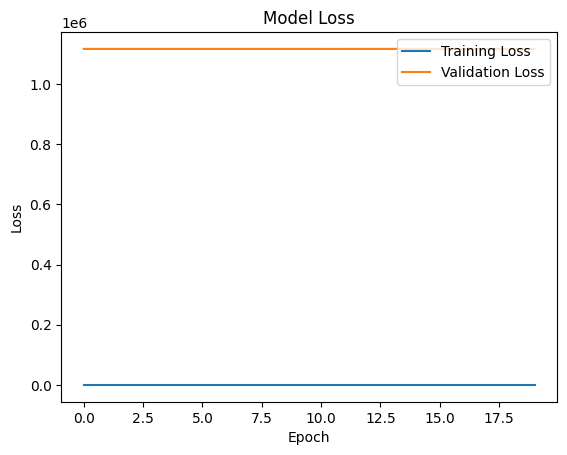

In [26]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# SPXW puts

In [27]:
X = df_SPXW_puts.drop(columns=['option_price', 'underlying_symbol', 'option_type','root'])
#Convert to Elapsed Time
X['quote_datetime'] = pd.to_datetime(X['quote_datetime'])
X['seconds_since'] = (X['quote_datetime'] - X['quote_datetime'].min()).dt.total_seconds()
X = X.drop(columns=['quote_datetime'])
X['expiration'] = pd.to_datetime(X['expiration'])
X['expiration_when'] = (X['expiration'] - X['expiration'].min()).dt.total_seconds()
X = X.drop(columns=['expiration'])
y = df_SPXW_puts['option_price']
X

,strike,open,high,low,close,trade_volume,bid_size,bid,ask_size,ask,underlying_bid,underlying_ask,implied_underlying_price,active_underlying_price,implied_volatility,delta,gamma,theta,vega,rho,open_interest,risk_free_rate,time_to_maturity,seconds_since,expiration_when
54971,1400.0,0.05,0.05,0.05,0.05,1,0,0.0,17248,0.05,5452.04,5456.22,0.0,5454.130,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,1,5.49,0.000000,0.0,0.0
54972,1400.0,0.00,0.00,0.00,0.00,0,0,0.0,17349,0.05,5447.04,5450.09,0.0,5448.565,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,1,5.49,0.000000,3600.0,0.0
54973,1400.0,0.00,0.00,0.00,0.00,0,0,0.0,17361,0.05,5471.24,5474.09,0.0,5472.665,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,1,5.49,0.000000,7200.0,0.0
54974,1400.0,0.00,0.00,0.00,0.00,0,0,0.0,17361,0.05,5486.01,5488.51,0.0,5487.260,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,1,5.49,0.000000,10800.0,0.0
54975,1400.0,0.00,0.00,0.00,0.00,0,0,0.0,17165,0.05,5460.76,5463.44,0.0,5462.100,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,1,5.49,0.000000,14400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513725,7800.0,0.00,0.00,0.00,0.00,0,1,1778.5,1,1811.20,5743.21,5745.98,0.0,5744.595,0.1322,-0.9816,0.0001,0.0,3.6619,-74.5091,2,3.55,1.460317,5450400.0,37238400.0
513726,7800.0,0.00,0.00,0.00,0.00,0,1,1782.9,1,1816.00,5738.07,5740.61,0.0,5739.340,0.1304,-0.9837,0.0001,0.0,3.4177,-74.6205,2,3.55,1.460317,5454000.0,37238400.0
513727,7800.0,0.00,0.00,0.00,0.00,0,1,1788.6,1,1821.30,5732.40,5735.07,0.0,5733.735,0.1302,-0.9844,0.0001,0.0,3.3423,-74.6503,2,3.55,1.460317,5457600.0,37238400.0
513728,7800.0,0.00,0.00,0.00,0.00,0,1,1781.4,1,1814.10,5740.63,5742.92,0.0,5741.775,0.1301,-0.9837,0.0001,0.0,3.4058,-74.6146,2,3.55,1.460317,5461200.0,37238400.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test) 
scaler_y = StandardScaler()
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Normalize the target variable (option prices)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)  # Fit and transform y_train
y_test_scaled = scaler_y.transform(y_test)        # Transform y_test (use the same scaler)

In [30]:
# Define the ANN model
model = Sequential()

# Add input layer and one hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add another hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer for regression
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict on test set
y_pred = model.predict(X_test)

# Inverse transform to get the original scale of predictions
y_pred_original_scale = scaler_y.inverse_transform(y_pred)

# Evaluate the model performance
mse = model.evaluate(X_test, y_test_scaled)
print(f'Mean Squared Error: {mse}')

Epoch 1/20
4349/4349 [==============================] - 10s 2ms/step - loss: 0.0079 - val_loss: 110373.8906
Epoch 2/20
4349/4349 [==============================] - 10s 2ms/step - loss: 9.8380e-04 - val_loss: 110374.3828
Epoch 3/20
4349/4349 [==============================] - 11s 2ms/step - loss: 0.0012 - val_loss: 110375.6875
Epoch 4/20
4349/4349 [==============================] - 10s 2ms/step - loss: 2.0690e-04 - val_loss: 110376.9219
Epoch 5/20
4349/4349 [==============================] - 9s 2ms/step - loss: 5.2929e-04 - val_loss: 110380.7031
Epoch 6/20
4349/4349 [==============================] - 10s 2ms/step - loss: 2.8433e-04 - val_loss: 110376.6953
Epoch 7/20
4349/4349 [==============================] - 9s 2ms/step - loss: 3.2174e-04 - val_loss: 110376.2500
Epoch 8/20
4349/4349 [==============================] - 10s 2ms/step - loss: 4.8429e-04 - val_loss: 110380.0547
Epoch 9/20
4349/4349 [==============================] - 10s 2ms/step - loss: 2.3548e-04 - val_loss: 110374.5625
Ep

In [31]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_original_scale))
print(f"RMSE on Original Scale: {rmse}")

RMSE on Original Scale: 2.3056472505737085


In [32]:
print(f'Predicted prices: {y_pred_original_scale}')
print(f'Actual prices: {y_test}')

Predicted prices: [[  8.990904]
 [ 79.72427 ]
 [ 23.593512]
 ...
 [  3.156111]
 [ 28.841063]
 [145.24515 ]]
Actual prices: [[  9.95]
 [ 79.5 ]
 [ 24.05]
 ...
 [  3.5 ]
 [ 29.55]
 [144.9 ]]


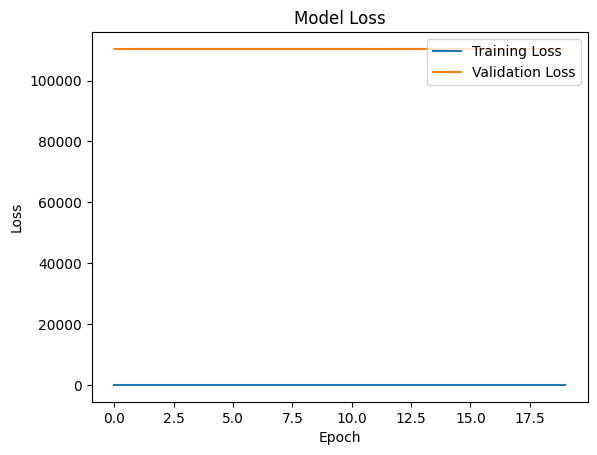

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()